#Тестовое задание
Необходимо построить базовый алгоритм распознавания текста из документов.

Основным документом будет являться паспорт РФ

Примеры 10 паспортов из открытых источников необходимо взять здесь:
https://disk.yandex.ru/d/kVdTaY8TuGvBkw

##0. Просмотр данных

In [21]:
#импорт необходимых библиотек и модулей
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
#подключаем гуглдиск
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#путь к данным
data_path = '/content/drive/MyDrive/Test/passport'
filesnames = [data_path + "/" + i for i in os.listdir(data_path)]
print(filesnames)

['/content/drive/MyDrive/Test/passport/9.jpeg', '/content/drive/MyDrive/Test/passport/2.jpeg', '/content/drive/MyDrive/Test/passport/1.jpeg', '/content/drive/MyDrive/Test/passport/8.jpeg', '/content/drive/MyDrive/Test/passport/3.jpeg', '/content/drive/MyDrive/Test/passport/0.jpeg', '/content/drive/MyDrive/Test/passport/7.jpeg', '/content/drive/MyDrive/Test/passport/5.jpeg', '/content/drive/MyDrive/Test/passport/6.jpeg', '/content/drive/MyDrive/Test/passport/4.png']


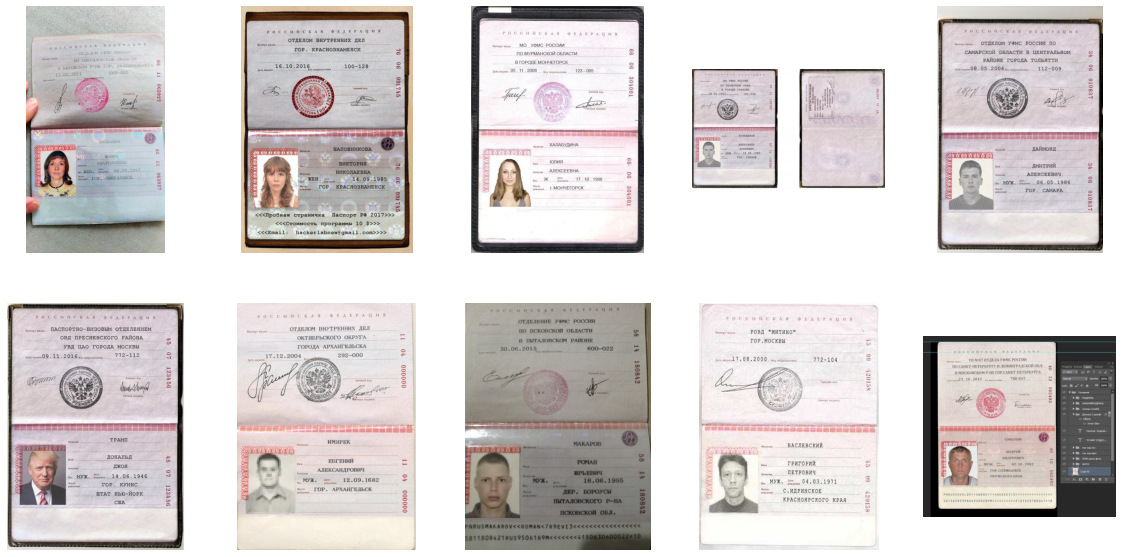

In [ ]:
#просмотр данных
pic_box = plt.figure(figsize=(20,10))
for i, picture in enumerate(filesnames):
  picture = cv2.imread(picture)
  picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
  pic_box.add_subplot(2,5,i+1)
  plt.imshow(picture)
  plt.axis('off')

plt.show()  

##1. Подобрать открытые библиотеки по распознаванию документов и провести распознавания паспортов с указанной ссылки

Используем инструмент оптического распознавания символов **Python-tesseract**.

In [ ]:
#установка необходимых библиотек и модулей
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-rus
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,863 kB/s)
debconf: unable to initi

In [ ]:
#импорт необходимых библиотек и модулей
import pytesseract
import shutil
import random
from PIL import Image

In [ ]:
#распознавание паспортов
for filename in filesnames:
  print(filename)
  print(pytesseract.image_to_string(Image.open(filename), lang='rus'))
  print('***************************************')
#pytesseract.image_to_data(Image.open(filename), lang='rus', output_type = 'data.frame')

/content/drive/MyDrive/Test/passport/9.jpeg
     
 
   

мс

ОТДЕЛОМ УФМС
ар а о з |
НО СВЕРДЛОВСКОЙ
— В КИРОВСКОМ Р-НЕ ГОР. ЕК

о = - 660-005

 

99

 

#2

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

***************************************
/content/drive/MyDrive/Test/passport/2.jpeg
РОССИЙСКАЯ ФЕДЕРАЦИЯ
ОТДЕЛОМ ВНУТРЕННИХ ДЕЛ
ГОР. КРАСНОЗНАМЕНСК

16.10.2016 — 100-128

дан

ШАПОШНИКОВА ®

ВИКТОРИЯ |
НИКОЛАЕВНА.
14.09.1985
=. ГОР. КРАСНОЗНАМЕНСК

311166 90 5

<<<Пробная страничка Паспорт РФ 2017>>>
<<<Стоимость программы 10 $>>>
<<<Ета:1: Васкег1аБпеи@9та11. соп>>>>

 

***************************************
/content/drive/MyDrive/Test/passport/1.jpeg
МО УФМС РОССИИ
ПО МУРМАНСКОЙ ОБЛАСТИ

В ГОРОДЕ МОНЧЕГОРСК
ОИ 28 Пе 10505

ХАЛАБУДИНА.

юлия

АЛЕКСЕЕВНА

= к 17.10.1988

22:.. Г МОНЧЕГОРСК

 

***************************************
/content/drive/MyDrive/Test/passport/8.jpeg
09455Т ТЕ 13

РР р пмвовес об-ой

С” Зосмш зиоволв

отмах днохомази ой

ииээо

##2. Подобрать API c помощью которых можно провести распознавание, провести распознавание.

Используем **Free OCR API** https://ocr.space/ocrapi

In [1]:
#установка необходимых библиотек и модулей
!pip install ocrspace

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ocrspace: filename=ocrspace-2.3.0-py3-none-any.whl size=2322 sha256=a58b4a4531738ccbd5564fc1a98975ae64f656482f38b574f00aa207491be0b4
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a6/10202501d463819a6b34f9b866daccbb7eac2958ad08be506c
Successfully built ocrspace


In [2]:
#импорт необходимых библиотек и модулей
import ocrspace
api = ocrspace.API(language=ocrspace.Language.Russian)

In [6]:
#распознавание паспортов
#filesnames = ['/content/drive/MyDrive/Test/passport/1.jpeg', '/content/drive/MyDrive/Test/passport/8.jpeg', '/content/drive/MyDrive/Test/passport/3.jpeg', '/content/drive/MyDrive/Test/passport/0.jpeg', '/content/drive/MyDrive/Test/passport/7.jpeg', '/content/drive/MyDrive/Test/passport/5.jpeg', '/content/drive/MyDrive/Test/passport/6.jpeg', '/content/drive/MyDrive/Test/passport/4.png']
for filename in filesnames:
  print(filename)
  print(api.ocr_file(filename))
  print('***************************************')

/content/drive/MyDrive/Test/passport/1.jpeg
Сс: Ий С к Л Я ф Е д
мо УФМС россии
ПО МУРМАнскои ОБЛАСТИ
з городе мончегоррк
ц
и
. 05 11 2008
ж
123 - 005
ХАЛАБУДИНА
юлия
АЛЕКСЕЕВНА
17 1988
Г МОНЧЕГОРСК

***************************************
/content/drive/MyDrive/Test/passport/8.jpeg
россий СКА я Ф Е д ЕРАция
мо УФМС россии
ПО ПЕРМСКОМУ КРАЮ
В ГОРОДЕ ГЛАЗОВЕ
. 2011
180-008
КУЗЕ ВАНОВ
—АЛЕКСАНДР
ИГОРЕВИЧ
_lB.09
гор. ГЛАЗОВ

***************************************
/content/drive/MyDrive/Test/passport/3.jpeg
ц
Паспорт выдан
СС ТЛ Й С КАЯ Ф ЕДЕ РА
ОТДЕЛОМ УФМС РОССИИ ПО
и
я
САМАРСКОЙ ОБЛАСТИ В ЦЕНТРАЛЬНОМ
РАЙОНЕ ГОРОДА ТОЛЬЯТТИ
08.05.2006
Дата выдачи
Код подразделения
с.лу„г
Фамилия
Имя
112-009
Личный код
Лич
ДАймонд
ДМИТРИЙ
подпись
АЛЕКСЕЕВИЧ
МУЖ
Место
рождения
дата
рождения
06.05.1986
ГОР . СААРА

***************************************
/content/drive/MyDrive/Test/passport/0.jpeg
ГОССИЙСК А Я ф ГД ЕРА ЦИЯ
испортно-визовьм ОТДЕЛЕНИЕМ
ОВД ПРЕСНЕНСКОГО РАЙОНА
увд иО ГОРОДА москвы
772-112
ТРА

##3. Oбучить собственный алгоритм (pytorch, tensorflow), которые распознает ФИО с паспорта.

Источник датасета https://github.com/wlinna/russian-ocr

###3.0. Пример работы предобученной модели из указанной ссылки

In [2]:
#клонируем репозиторий
!git clone https://github.com/wlinna/russian-ocr.git

Cloning into 'russian-ocr'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (26/26), done.


In [5]:
#запускаем предсказание модели
#предобученная модель https://drive.google.com/file/d/1AK815jB_4lxHsy33eabmIFsPRV5DYMQ5/view
%cd /content/russian-ocr
!python predict.py --model '/content/drive/MyDrive/Test/git_model.pth' '/content/drive/MyDrive/Test/passport/4.png'

/content/russian-ocr
>язязя9зязвзв>я>я>я>я>я>я>я>я>взвжвзвзвзвзвязвязяз>язвя>я>я>я>я>я>я>я>яЗя>Бязвзязвзвзязязязязявзв>я>я>я>я>я>я>я>я>я>я>явзвзвзвзвзвязязявязя>звя>я>я>яЗя>я>я>я>язязязязявзвзв>я>я>я>я>я>я>я>язя>я>явзвзвзвзвзвзвзвязязявязязвя>я>я>я>З>я>я>язвзвз9я9з9взв>я>я>я>я>я>я>я>язя>явзвзвзвзвзвязязявя>звзя>я>я>я>З>я>я>язвзязязязязяаязвав>я>я>я>я>я>я>язяз>я>явзвзвзвзвзвзвязязязвзвзязвзя>я>яЗя>Зя>Зя>я>язязязязязязяз9звазав>я>яа>я>я>я>яаяая>я>яз>я>з>явзвжзвзвзвязязявзя>звя>я>я>яЗя>я>я>я>язяз9язязазавзвав>я>я>я>я>я>я>з>зязя>явзвжвзвязязязявзязвя>я>яЗя>я>я>я>язязвзязязязязязязяз9язеаза>вав>я>я>я>я>я>я>я>я>я>я>з>зя>явжзжзжвжвязязязявзвзвя>я>я>яЗяЗяЗя>я>я>язяз>язязязязязязяз9яз9зва>а>в>я>яая>я>я>я>яая>я>я>я>я>з>з>явжяжяжвжвявя>вя>я>я>я>я>яЗяЗя>я>я>Бязвзвзвзвзязяз9язя9звза>в>я>я>я>я>я>я>яая>я>я>яз>з>явжяжвяжвжвжяжяжяжвжяжзжвзвявя>в>явя>я>я>я>я>яЗя>я>Бязвзвзвзя9звзв>я>я>я>я>я>я>я>я>я>я>я>я>я>я>явжявжвжяжявжзжвжяжвзжвяеявявя>вя>я>я>я>яЗя>яЗяЗя>Б>Бязвзвзвзвзя9звзвзв>я>я>я>я>я>я>я>я>я>я>я>я>я

###3.1.Самописный алгоритм OCR

**Подготовка данных**

In [ ]:
#!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 362 kB/s 


In [ ]:
#распаковка архива с данными
# import patoolib
# patoolib.extract_archive("/content/drive/MyDrive/Test/Dataset.rar", outdir="/content/drive/MyDrive/Test")

In [ ]:
# data_path = '/content/drive/MyDrive/Test'
# files_names = [f[:(f.rindex('.'))] for f in os.listdir(data_path) if f.endswith('.png')]
# print(len(files_names))
# train_files_names = files_names[:int(len(files_names)*0.8)] 
# val_files_names = files_names[int(len(files_names)*0.8):] 
# print('Тренировочных данных: ', len(train_files_names))
# print('Валидационных данных: ', len(val_files_names))

In [ ]:
# os.mkdir("/content/drive/MyDrive/Test/train")
# os.mkdir("/content/drive/MyDrive/Test/val")

In [12]:
#пути к данным
traindata_path = '/content/drive/MyDrive/Test/train'
valdata_path = '/content/drive/MyDrive/Test/val'

In [ ]:
#собираем тренировочные и валидационные данные
import shutil

for file in train_files_names:
  shutil.move(data_path + "/" + file + '.png', traindata_path)
  shutil.move(data_path + "/" + file + '.gt.txt', traindata_path)
print(len(os.listdir(traindata_path)))

for file in val_files_names:
  shutil.move(data_path + "/" + file + '.png', valdata_path)
  shutil.move(data_path + "/" + file + '.gt.txt', valdata_path)
print(len(os.listdir(valdata_path)))

9600
2400


**Датасеты и даталоадеры**

In [8]:
#импорт необходимых библиотек и модулей
from skimage import io
import os
import torch
from torch.utils.data import Dataset
import numpy as np
import torch
import torch.nn as nn

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [10]:
WS_SYMBOL = '^'
SYMBOL_SET = WS_SYMBOL + ' .,?:;—!<>-«»()[]*"АаБбВвГгДдЕеЁёЖжЗзИиЙйКкЛлМмНнОоПпРрСсТтУуФфХхЦцЧчШшЩщЪъЫыЬьЭэЮюЯя0123456789'
WIDTH = 25
WS_CODE = SYMBOL_SET.index(WS_SYMBOL)

In [13]:
#Датасеты
class CustomDataset(Dataset):
    def __init__(self, data_path):
        self.data_path = data_path
        #все изображения в формате png
        self.sample_ids = [f[:(f.rindex('.'))] for f in os.listdir(data_path) if f.endswith('.png')]
    
    def __len__(self):
        return len(self.sample_ids)
    
    def __getitem__(self, i):
        sample_path = self.data_path + '/' + self.sample_ids[i] 
        #загрузка изображений
        img = io.imread(sample_path + '.png')
        img = torch.from_numpy(img).view(1, 32, -1).float()
        #загрузка текста
        with open(sample_path + '.gt.txt') as f:
            label = f.read().strip('\n')
            missing_chars = WIDTH - len(label)
            if missing_chars > 0:
                label += ' ' * missing_chars
        text = np.array([SYMBOL_SET.index(c) for c in label], dtype=np.int64)

        return (img, text, len(label))

train_dataset = CustomDataset(traindata_path)
valid_dataset = CustomDataset(valdata_path)
print('Количество экземплятор в тренировочном датасете: ', len(train_dataset))
print('Количество экземплятор в валидационном датасете: ', len(valid_dataset))

Количество экземплятор в тренировочном датасете:  4800
Количество экземплятор в валидационном датасете:  1200


In [14]:
#Даталоадеры

BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False,
                          num_workers=0)

In [15]:
train_features, train_text, train_len = next(iter(train_loader))
print(train_features.shape, train_text.shape, train_len.shape)

torch.Size([32, 1, 32, 340]) torch.Size([32, 25]) torch.Size([32])


**Построение и обучение модели**

In [16]:
#Построение сети
_CNN_OUT_CHANS = 60

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 40, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(40, _CNN_OUT_CHANS, 3, padding=1),
            nn.MaxPool2d(2),
            nn.ReLU(),            
        ) 
        self.avgpool = nn.AdaptiveAvgPool2d((1, None))
        self.classifier = nn.Linear(_CNN_OUT_CHANS, len(SYMBOL_SET))
        self.log_softmax = nn.LogSoftmax(dim=2)
        
    def forward(self, x):
        # The image size in training: 340 x 32
        # [B, Cin, Hin, Win]:     [B, 1, 32, 340]
        x = self.conv(x)    #     [B, 60, 8, 85]
        x = self.avgpool(x) #     [B, 60, 1, 85]
        # Reshape to the format expected by a Linear layer : [B, *, features]
        x = x.permute(0, 3, 1, 2).view(x.size(0), x.size(3), -1)
        x = self.classifier(x) #  [B, seq_len (85), features = |symbol_set|]
        # log_softmax expects inputs in the following shape
        x = x.permute(1, 0, 2) #  [seq_len (85), B, features = |symbol_set|]
        x = self.log_softmax(x)
        return x

In [17]:
# инициализация модели
net = Net().to(device)
print(net)

Net(
  (conv): Sequential(
    (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, None))
  (classifier): Linear(in_features=60, out_features=96, bias=True)
  (log_softmax): LogSoftmax(dim=2)
)


In [18]:
# компиляция модели
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CTCLoss(reduction='mean', zero_infinity=True)

In [19]:
import editdistance

def accuracy(predicted: str, target: str):
    normalizer = max(len(predicted), len(target))
    if normalizer == 0:
        return 1.0
    return 1 - editdistance.eval(predicted, target) / normalizer

def simplify(str_in):
        return str_in.strip().replace('  ', ' ')

def numbers_to_text(arr) -> str:
    return ''.join([SYMBOL_SET[code] for code in arr])

def decode_sequence(seq):
    out = []
    current_code = None
    for i, v in enumerate(seq):
        if v == current_code:            
            continue
        current_code = v
        if v == WS_CODE:
            current_code = None
            continue
        out.append(v)
    return ''.join(numbers_to_text(out))

def decode_batch(input): # input in shape: [B, seq, feature]
    # Из последнего измерения выбираются индексы с наибольшей вероятностью (эти индексы указывают на SYMBOL_SET)
    maxed = torch.argmax(input.cpu(), -1).numpy()
    # [B, seq] : каждое значение является индексом для SYMBOL_SET
    return [decode_sequence(seq) for seq in maxed]

In [20]:
# обучение и валидация модели
def train_eval_model(net, num_epochs, train_loader, valid_loader):
    for epoch in range(num_epochs):  
        net.train()
        running_loss, total_accuracy, running_items = 0.0, 0.0, 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels, lng = data[0].to(device), data[1].to(device), data[2].to(device)

            # обучение
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels, lng, lng)   #loss = criterion(outs_decoded, labels_decoded, lng, lng)
            loss.backward()
            optimizer.step()
            
            #статистика
            outputs = outputs.permute(1, 0, 2)
            outs_decoded = decode_batch(outputs)
            labels_decoded = [numbers_to_text(t) for t in labels]
            total_accuracy += accuracy(outs_decoded, labels_decoded)
            running_loss += loss.item()
            running_items += len(outs_decoded)
            
            # выводим статистику о процессе обучения
            if i % 300 == 0:    # печатаем каждые 300 mini-batches
                net.eval()
                print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                      f'Step [{i + 1}/{len(train_loader)}]. ' \
                      f'Loss: {running_loss / running_items:.3f}. ' \
                      f'Acc: {total_accuracy / running_items:.3f}', end='. ')
                running_loss, total_accuracy, running_items = 0.0, 0.0, 0.0

                test_total_accuracy, test_running_items = 0.0, 0.0
                for i, data in enumerate(valid_loader):
                    test_outputs = net(data[0].to(device))
                    test_targets = data[1].to(device)

                    test_outputs = test_outputs.permute(1, 0, 2)
                    outs_decoded = decode_batch(test_outputs)
                    targets_decoded = [numbers_to_text(t) for t in test_targets]
                    
                    for j in range(len(outs_decoded)):
                        decoded_out, target_out = simplify(outs_decoded[j]), simplify(targets_decoded[j])
                        total_accuracy += accuracy(decoded_out, target_out)
                    test_running_items += len(outs_decoded)

                print(f'Test acc: {test_total_accuracy / test_running_items:.3f}')

    print('Training is finished!')

In [23]:
train_eval_model(net, 10, train_loader, valid_loader)

Epoch [1/10]. Step [1/150]. Loss: 0.095. Acc: 0.000. Test acc: 0.000
Epoch [2/10]. Step [1/150]. Loss: 0.083. Acc: 0.000. Test acc: 0.000
Epoch [3/10]. Step [1/150]. Loss: 0.081. Acc: 0.000. Test acc: 0.000
Epoch [4/10]. Step [1/150]. Loss: 0.087. Acc: 0.000. Test acc: 0.000
Epoch [5/10]. Step [1/150]. Loss: 0.075. Acc: 0.000. Test acc: 0.000
Epoch [6/10]. Step [1/150]. Loss: 0.077. Acc: 0.000. Test acc: 0.000
Epoch [7/10]. Step [1/150]. Loss: 0.088. Acc: 0.000. Test acc: 0.000
Epoch [8/10]. Step [1/150]. Loss: 0.079. Acc: 0.000. Test acc: 0.000
Epoch [9/10]. Step [1/150]. Loss: 0.076. Acc: 0.000. Test acc: 0.000
Epoch [10/10]. Step [1/150]. Loss: 0.070. Acc: 0.000. Test acc: 0.000
Training is finished!


In [24]:
#сохранение модели
torch.save(net, '/content/drive/MyDrive/Test/model_ocr')

**Тестирование модели**

In [25]:
#загрузка модели
net = torch.load('/content/drive/MyDrive/Test/model_ocr')
net = net.to(device)
net.eval()

Net(
  (conv): Sequential(
    (0): Conv2d(1, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(40, 60, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, None))
  (classifier): Linear(in_features=60, out_features=96, bias=True)
  (log_softmax): LogSoftmax(dim=2)
)

Распознаннный текст:  т о Р


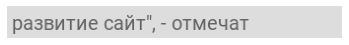

In [28]:
i#получение предсказаний модели
def recognize_img(net, path):
  img = io.imread(path)
  img = torch.from_numpy(img).view(1, 32, -1).float()
  img = img.to(device)
  img = torch.unsqueeze(img, dim=0)
  result_batch = net(img).permute(1, 0, 2)
  result = decode_batch(result_batch)[0]
    
  return result

img_path = '/content/drive/MyDrive/Test/val/2398_a.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
print('Распознаннный текст: ', recognize_img(net, img_path))